# **Deep learning practical assignment #1** : 

## Linear Classifier : Perceptron

## **Theorical questions**

### *1. Time complexity*

Time complexity is the amount of time taken by an algorithm to run, as a function of the length of the input. The perceptron algorithm shows that based on the length of the iterations (n) and the number of examples (m), the run time will get linearly increased.

As Big O Notation expresses the run time of an algorithm in terms of how quickly it grows relative to the input, the **time complexity** of the perceptron algorithm will be **O(n*m)**.

### 2. *Space complexity*

Space Complexity of perceptron is the total space taken by the algorithm with respect to the input size.The space requirement for **m** input patterns having a dimension **d** is **m*d** and for the weight is **m*(d+1)**. Thus, the overall space complexity is **O(m.d)**.



## **Installation**

In [1]:
!pip install matplotlib==3.2.2 numpy==1.19.5 scikit-learn==0.22.2.post1

## **Implementation**

In [2]:
#Importing necessary librairies
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

### Functions definition : 

In [3]:
def perceptron(X, y_, epochs):
  '''
  perceptron function determines weights in order to separate a supervised learning problem.

  :X: the examples of the dataset
  :y_: the labels of the dataset
  :epochs: the number of iterations

  :return: the value of the weights calculated 

  '''
  # Inserting a column to the X vector to match the dimension of the weight vector
  X = np.insert(X, 0, 1, axis=1)
  #getting the shape of the input points X
  m, n = X.shape

  # Initilizing the weight "theta" to 0
  theta = np.zeros((n,1))

  # saving the theta values in a list of weights
  weights = [] 
  weights.append(theta)
  
  # Iterating through the epochs
  for epoch in range(epochs):
    # Iterating through the observations of the dataset
    for idx, x_i in enumerate(X):
      # Updating the value of the weight theta
      x_i = x_i.reshape(-1,1)
      if (np.squeeze(np.dot(x_i.T, theta)) * y_[idx]) <= 0:
        theta = theta + y_[idx]*x_i

    # Saving the theta value to the weights list
    weights.append(theta)
    # Returning weights if the perceptron algorithm converges
    if (np.array_equal(weights[-2], theta)) :
      return weights[-2]

  # Returning the weights in case the perceptron algorithm doesn't converge
  return theta

In [4]:
def plot_dataset_visualization(X, y):
  '''
  plot_dataset_visualization is a representation of the dataset observations according to their classes.

  :X: the examples of the dataset
  :y: the labels of the dataset

  ''' 
  # Plotting
  fig = plt.figure(figsize=(10,8))
  plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^", label="Label Y = -1")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Label Y = 1")
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.title("Dataset visualization")
  plt.legend()
  plt.ylim(-1, 1)

In [5]:
def plot_decision_boundary(X, y, theta):
  '''
  plot_decision_boundary is a representation of the decision boundary deducted from the value of the weight
  returned by the perceptron algorithm.

  :X: the examples of the dataset
  :y: the labels of the dataset
  :theta: the result weight of the perceptron algorithm

  ''' 
  # Calculating the equation of the decision boundary
  x1 = [min(X[:,0]), max(X[:,0])]
  m = -theta[1]/theta[2]
  c = -theta[0]/theta[2]
  x2 = m*x1 + c
  
  # Plotting the decision boundary
  fig = plt.figure(figsize=(10,8))
  plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^", label="Label Y = -1")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Label Y = 1")
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.title("Data visualization with perceptron's decision Boundary")
  plt.plot(x1, x2, 'y-', label = "Decision boundary")
  plt.ylim(-1, 1)
  plt.legend()

In [6]:
def generate_dataset(sigma1, sigma2) :
  '''
  generate_dataset is a generation of the Toy dataset.

  :sigma1: The gaussian distribution's variance of the first 125 examples of the dataset
  :sigma2: The gaussian distribution's variance of the second 125 examples of the dataset

  :return: the 250 examples of the Toy dataset "x" and their corresponding labels "y"
  '''
  # Intilizing mu1 and mu2 of the gaussian distribution, the examples "x" and their labels "y"   
  mu1 = [-1, 0]
  mu2 = [1, 0]
  x = np.zeros((250,2))
  y = []

  # Generating the first 125 examples and their corresponding labels 
  for i in range(125) : 
    # Gaussian distribution of the first 125 x_i
    x[i] = sigma1 * np.random.randn(1,2)+mu1
    # Labeling the first 125 y_i
    y.append(-1)

  # Generating the second 125 examples and their corresponding labels 
  for i in range(125, 250) :
    # Gaussian distribution of the second 125 x_i
    x[i]= sigma2 * np.random.randn(1,2)+mu2
    # Labeling the first 125 y_i
    y.append(1) 

  #changing the y list to a numpy array
  y = np.array(y)
  return x,y

In [7]:
def predict(row, weight):
	'''
	This function predicts the class of the examples of the test set

	:row: the example x_i
	:weight: the weight result of the perceptron algorithm 

	:return: 1 or -1 according to the scalar product between weight and row 
	'''
	activation = weight[0]
	for i in range(len(row)-1):
		activation = activation + weight[i + 1] * row[i]
	return 1 if activation >= 0 else -1

In [8]:
def erro(X, y, theta):
  '''
	The erro function calculates the error in the prediction on the test set compared to their ground truth.

	:X: the examples of the dataset
	:y: the labels of the dataset

	:return: the error value
	'''
  i = 0
  for idx, x_i in enumerate(X):
    prediction = predict(x_i, theta)
    if (prediction != y[idx]):
      i = i + 1
  return i/len(X)

In [9]:
def accuracy(X, y, theta):
  '''
  The accuracy function calculates the percentage of correctly classified points by the total points

  :X: the examples
  :y: the labels
  :theta: the weight calculated by the perceptron algorithm
  '''
  # The accuracy and the error are complementary
  return 1 - erro(X, y, theta)

### **Experiment 1**

In [10]:
# Generating dataset with 0.25 as sigma value
X, y = generate_dataset(0.25, 0.25)

# Splitting the dataset (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

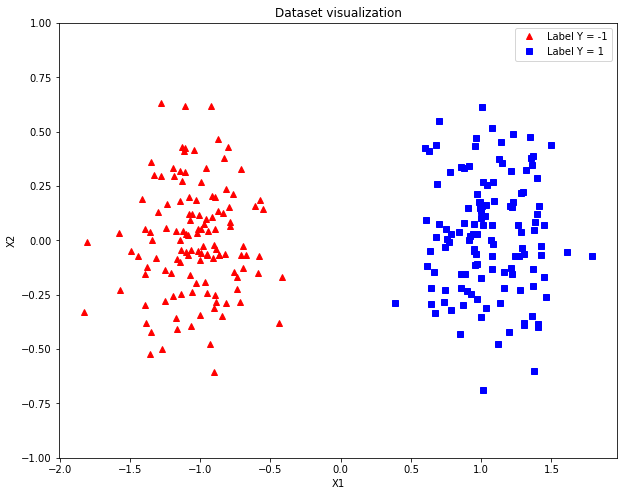

In [11]:
# Visualizing the dataset 
plot_dataset_visualization(X, y)

**Interpretation:** Examples can be clearly separated into red and blue 
classes; hence, they are linearly separable. So, the perceptron algorithm converges.



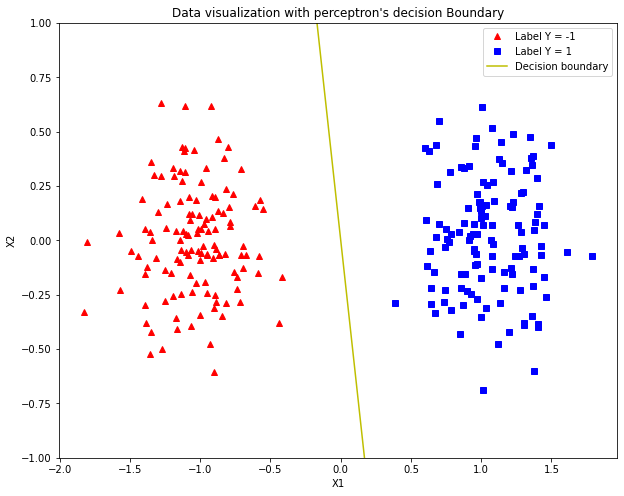

In [12]:
# Applying the perceptron algorithm on the training set
theta = perceptron(X_train, y_train, 10)

# Plotting the decision boundary
plot_decision_boundary(X, y, theta)

**Interpretation :** For the same initialized values of weights, the decision boundary is unique. However, if we change the initialisation, we get a different set of weights as a result of the algorithm, so, a different decision boundary. But, the algorithm will still converge regardless of the initialisation.

Accuracy = 1.0


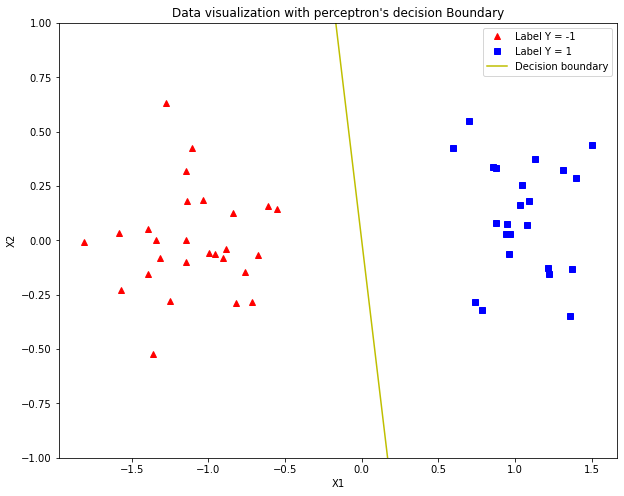

In [13]:
# Plotting the decision boundary on the test set
plot_decision_boundary(X_test, y_test, theta)

# Calculating the accuracy
acc = accuracy(X_test, y_test, theta)
# Printing the accuracy
print("Accuracy = "+ str(acc))

### **Experiment 2**

In [14]:
# Generating dataset with 0.75 as sigma value
X, y = generate_dataset(0.75, 0.75)

# Splitting the dataset (80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

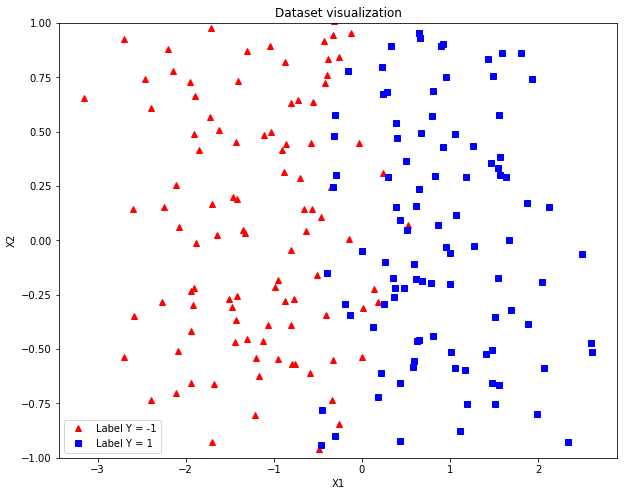

In [15]:
# Visualizing the dataset
plot_dataset_visualization(X, y)

**Interpretation:** By changing the value of the variance of the gaussian distribution from 0.25 to 0.75, examples are no more linearly separable, they cannot be correctly classified by any straight line. So, the perceptron algorithm does not converge.

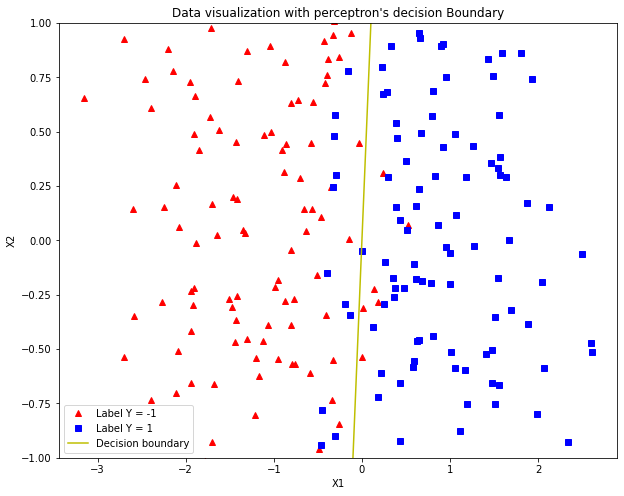

In [16]:
# Applying the perceptron algorithm on the training set
theta = perceptron(X_train, y_train, 10)

# Plotting the decision boundary
plot_decision_boundary(X, y, theta)

**Interpretation:** For the same initialized values of weights, the decision boundary is unique. However, if we change the initialisation, we get a different set of weights as a result of the algorithm, so, a different decision boundary. But, the algorithm will still not converge regardless of the initialisation.

Accuracy = 0.9


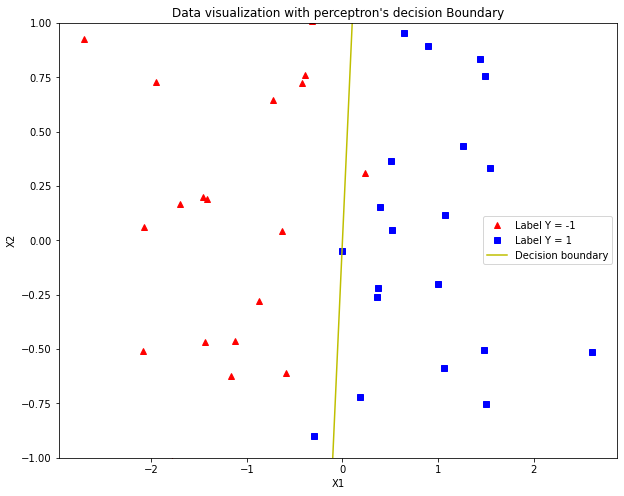

In [17]:
# Plotting the decision boundary on the test set
plot_decision_boundary(X_test, y_test, theta)

# Calculating the accuracy
acc = accuracy(X_test, y_test, theta)
# Printing the accuracy value
print("Accuracy = "+ str(acc))

### **Experiment 3**

In [18]:
def VarMean(n):
  '''
  The VarMean function calculates the variance and mean of errors stored over 30 experiments  for a given sigma

  :n: sigma
  
  '''
  errors = []
  for i in range(30):
    X, y = generate_dataset(n, n)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    theta = perceptron(X_train, y_train, 10)
    error = erro(X_test, y_test, theta)
    errors.append(error)

  var = np.var(errors)
  mean = np.mean(errors)

  return var, mean


In [19]:
#Computing mean and variance for each sigma
means = []
vars = []
for i in [0.01, 0.1, 0.5, 0.7]:
  var, mean = VarMean(i)
  #print("pour sigma= "+ str(i)+ "    var   " + str(var)+ "   mean    "+str(mean))
  vars.append(var)
  means.append(mean)

Text(0.5, 1.0, 'Errorbar visualization')

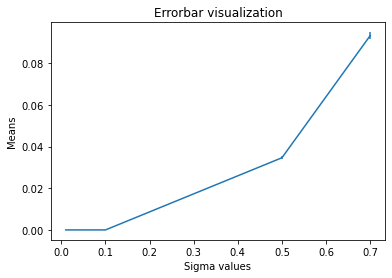

In [20]:
# Plotting the errorbar
plt.errorbar([0.01, 0.1, 0.5, 0.7], means, yerr=vars)
plt.xlabel('Sigma values')
plt.ylabel('Means')
plt.title('Errorbar visualization')

**Interpretation :**  The length of the error bars is the variance of the calculated errors. Small error bars imply better accuracy than larger ones. So, as the graph shows, by increasing the value of the **sigma** in the gaussian distribution from 0.01 to 0.7, the value of the variance increases, that's why the error bars gets larger. 